In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

Matplotlib is building the font cache; this may take a moment.


create an unbalanced dataset with 2 classes, and each data point has 2 features

In [68]:
num_samples_c1 = 1000
num_samples_c2 = 100
mean_c1 = [0.5, 0.5]  # Mean vector
mean_c2 = [2, 2]  # Mean vector
cov = [[0.5, 0], [0, 0.5]]  # Covariance matrix
x_c1 = np.random.multivariate_normal(mean_c1, cov, size=num_samples_c1)
x_c2 = np.random.multivariate_normal(mean_c2, cov, size=num_samples_c2) 

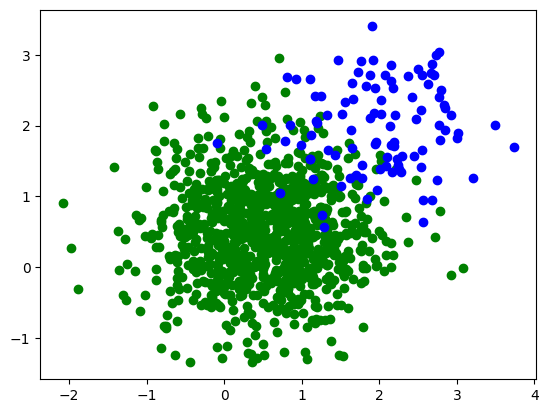

In [69]:
plt.plot(x_c1[:, 0], x_c1[:, 1], 'og')
plt.plot(x_c2[:, 0], x_c2[:, 1], 'ob')
plt.show()

now let's train a little MLP on all data just to see what happens

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim

thanks to gemini we can quickly generate a class for a small MLP and a function that computes the accuracy from an MLPs prediction for a classification problem

In [71]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [72]:
def calculate_accuracy(predictions, targets):
    """
    Calculates the accuracy of the model's predictions.

    Args:
        predictions (torch.Tensor): Model predictions (e.g., logits or probabilities)
        targets (torch.Tensor): Ground truth labels

    Returns:
        float: Accuracy value between 0 and 1
    """

    # Get the predicted class indices
    _, predicted_classes = torch.max(predictions, dim=1)

    # Check where predictions match targets
    correct_predictions = (predicted_classes == targets).sum().item()

    # Calculate accuracy
    accuracy = correct_predictions / targets.size(0)

    return accuracy

In [73]:
# create tensors of artificially generated data
data = torch.tensor(np.vstack([x_c1,x_c2]), dtype=torch.float32)
labels = torch.tensor(np.concat([np.zeros(num_samples_c1), np.ones(num_samples_c2)]), dtype=torch.long)


In [74]:
# Create the model, loss function, and optimizer
model = MLP(2, 100, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [75]:
# Training loop
epochs = 100
outputs = model(data)
loss = criterion(outputs, labels)
print(f'Epoch [-1], Loss: {loss.item():.4f}, Acc: {acc:.4f}')
for epoch in range(epochs):
    # Forward pass
    outputs = model(data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        acc = calculate_accuracy(outputs, labels)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Acc: {acc:.4f}')

Epoch [-1], Loss: 0.6698, Acc: 0.9922
Epoch [10/100], Loss: 0.2365, Acc: 0.9091
Epoch [20/100], Loss: 0.1176, Acc: 0.9664
Epoch [30/100], Loss: 0.0904, Acc: 0.9655
Epoch [40/100], Loss: 0.0831, Acc: 0.9673
Epoch [50/100], Loss: 0.0801, Acc: 0.9673
Epoch [60/100], Loss: 0.0791, Acc: 0.9682
Epoch [70/100], Loss: 0.0788, Acc: 0.9691
Epoch [80/100], Loss: 0.0785, Acc: 0.9691
Epoch [90/100], Loss: 0.0783, Acc: 0.9691
Epoch [100/100], Loss: 0.0781, Acc: 0.9682
